In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import eye
import Analysis
%matplotlib inline

In [13]:
df_train = pd.read_csv('cs-training.csv', header=0)
df_train.reset_index()
df_train = df_train.rename(columns={'Unnamed: 0':'ID', 
                        'NumberOfTime30-59DaysPastDueNotWorse':'Less2months',
                       'NumberOfTimes90DaysLate':'More3months',
                       'NumberOfTime60-89DaysPastDueNotWorse':'Less3months'})
df_train = df_train.set_index('ID')
df_train = df_train.fillna(df_train.mean())
x_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_train_std = pd.DataFrame(x_train_std)
x_train_std.index = x_train_std.index + 1
x_train_std.columns = df_train.iloc[:, 1:].columns

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

forest = RandomForestClassifier(random_state=1)
forest.fit(x_train, y_train)
print('Train score: {}'.format(forest.score(x_train, y_train)))
print('accuracy score: {:.3f}'.format(accuracy_score(y_train, forest.predict(x_train))))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_train, forest.predict(x_train))))
print('f1 score: {:.3f}'.format(f1_score(y_train, forest.predict(x_train))))

Train score: 0.9907066666666666
accuracy score: 0.991
Confusion matrix:
[[139940     34]
 [  1360   8666]]
f1 score: 0.926


([<matplotlib.axis.YTick at 0x7f572f103a90>,
 <a list of 10 Text yticklabel objects>)

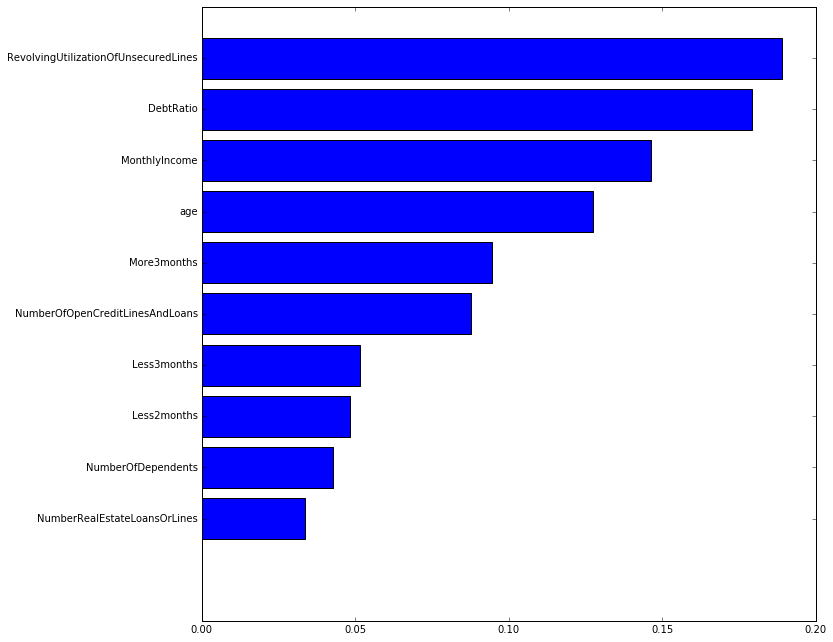

In [19]:
values, names = zip(*sorted(zip(forest.feature_importances_, x_train.columns)))

plt.figure(figsize=(11,11))
plt.barh(range(len(names)), values, align='center')
plt.yticks(range(len(names)), names)

In [21]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
# ハイパーパラメータ
forest_grid_param = {
    'n_estimators': [10],
    'max_features': [1, 2, None],
    'max_depth': [1, 5, 10, None],
    'min_samples_leaf': [1, 4, 5,]
}

# スコア方法をF1に設定
f1_scoring = make_scorer(f1_score,  pos_label=1)

# グリッドサーチで学習
forest_grid_search = GridSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1), forest_grid_param, scoring=f1_scoring, cv=4)
forest_grid_search.fit(x_train, y_train)

# 結果
print('Best parameters: {}'.format(forest_grid_search.best_params_))
print('Best score: {:.3f}'.format(forest_grid_search.best_score_))

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

Best parameters: {'min_samples_leaf': 4, 'max_depth': None, 'n_estimators': 10, 'max_features': None}
Best score: 0.295


In [24]:
best_params = forest_grid_search.best_params_

forest = RandomForestClassifier(random_state=0, n_jobs=-1, 
                                max_depth=best_params['max_depth'], 
                                max_features=best_params['max_features'], 
                                min_samples_leaf=best_params['min_samples_leaf'],
                                n_estimators=best_params['n_estimators'])
forest.fit(x_train, y_train)
print('Train score: {:.3f}'.format(forest.score(x_train, y_train)))
print('accuracy score: {:.3f}'.format(accuracy_score(y_train, forest.predict(x_train))))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_train, forest.predict(x_train))))
print('f1 score: {:.3f}'.format(f1_score(y_train, forest.predict(x_train))))

Train score: 0.962
accuracy score: 0.962
Confusion matrix:
[[139611    363]
 [  5359   4667]]
f1 score: 0.620


In [27]:
from mlxtend.plotting import plot_decision_regions
x_combined = np.vstack((x_train))
y_combined = np.hstack((y_train))

plot_decision_regions(x_combined, y_combined, 
                      clf=forest)

plt.tight_layout()
# plt.savefig('./figures/random_forest.png', dpi=300)
plt.show()

ValueError: X must be an integer or float array. Found <U36.

In [22]:
from mlxtend.plotting import plot_decision_regions
#plt.style.use('ggplot') 

X_combined_std = np.vstack((x_train_std))
y_combined = np.hstack((y_train))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined_std, y_combined, clf=logistic)
plt.show()

ValueError: X must be an integer or float array. Found <U36.

In [30]:
def plot(dataframe):
    length = len(dataframe.columns())
    plt.figure(figsize=(length,length))
    sns.heatmap(dataframe.corr(), annot=True)

In [ ]:
plot

<Container object of 10 artists>

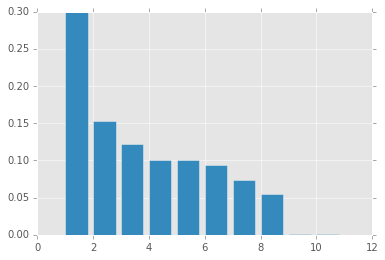

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x_train_std)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

x_train_std: (150000, 5)
explained variance ratio: [ 0.29948872  0.1533157   0.12254696  0.10092078  0.10010863]


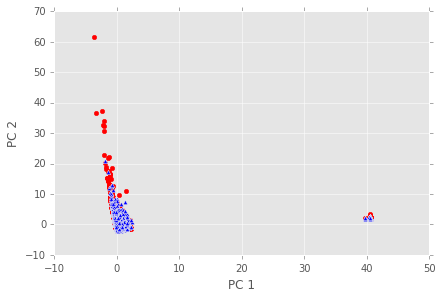

In [30]:
pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train_std)
print('x_train_std: {}'.format(x_train_pca.shape))

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(x_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o', color='red') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.tight_layout()
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

In [43]:
from sklearn.pipeline import Pipeline
pca_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('decomposition', PCA(n_components=5)),
    ('model', LogisticRegressionCV(cv=10, random_state=0))
])

# 標準化・次元圧縮・学習
pca_pipeline.fit(x_train, y_train)

# 検証
print('Train score: {:.3f}'.format(pca_pipeline.score(x_train, y_train)))
#print('Test score: {:.3f}'.format(pca_pipeline.score(X_test, y_test)))
#print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=pca_pipeline.predict(X_test))))

NameError: name 'LogisticRegressionCV' is not defined

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5,random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image
Image(graph.create_png())

AttributeError: 'DecisionTreeClassifier' object has no attribute 'export_graphviz'